# NLP - Preprocessing

- 참고: [Stamming and lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)

## NLTK
공식 홈페이지: https://www.nltk.org/data.html

NLP를 위해 먼저 `nltk`라는 패키지를 설치한다.

In [1]:
# !pip install --upgrade nltk

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\u\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

저번 시간에 수집했던 뉴스 기사들을 이용하고자 한다.

In [3]:
import sqlite3
conn = sqlite3.connect('news.db')
cur = conn.cursor()

In [4]:
query = """
    SELECT id, url, content, date
    FROM news;
"""
cur = conn.execute(query)

In [5]:
contents = [content[2] for content in cur.fetchall()]
len(contents), len(contents[0]), len(contents[0].split()), len(
    contents[0].splitlines())

(36, 2323, 527, 26)

In [6]:
from nltk.tokenize import sent_tokenize
len(sent_tokenize(contents[0]))

23

구두점은 다음과 같다.

In [7]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
sent_tokenize('''
    Life is too short...... Life is to short?????
    Life is too short Life is too short
''')

['\n    Life is too short...... Life is to short?????',
 'Life is too short Life is too short']

In [9]:
sent_tokenize('''
    K-Data 주관 고려대학교
    빅데이터 청년인재 자연어 처리 과정
''')

['\n    K-Data 주관 고려대학교\n    빅데이터 청년인재 자연어 처리 과정']

In [10]:
from nltk.tokenize import word_tokenize
word_tokenize('Life is too short')

['Life', 'is', 'too', 'short']

In [11]:
word_tokenize('''
'안녕'하세요? '반갑'습니다.
"안녕"하세요
''')

["'안녕'하세요", '?', "'반갑'습니다", '.', '``', '안녕', "''", '하세요']

In [12]:
len(word_tokenize(contents[0])), len(sent_tokenize(contents[0]))

(691, 23)

## KoNLPy

In [13]:
# !pip install --upgrade konlpy

In [14]:
from konlpy.tag import Kkma
len(Kkma().morphs(contents[0]))

1245

In [15]:
word_tokenize('Happy Life!! :-)')

['Happy', 'Life', '!', '!', ':', '-', ')']

In [16]:
from nltk.tokenize import TweetTokenizer
TweetTokenizer().tokenize('Happy Life!! :-)')

['Happy', 'Life', '!', '!', ':-)']

In [17]:
from nltk.tokenize import regexp_tokenize
import re

In [18]:
pattern = re.compile(r'\b([가-힣]+)\b')
regexp_tokenize('Happy Life!! 한글 한!@#!@#!@#글:-)', pattern)

['한글', '한', '글']

In [19]:
pattern = r'[^ ㄱ-ㅎㅏ-ㅣ가-힣]'
re.sub(pattern, '', '한글 ㅋㅋ ㅠ.ㅠ adsfasf ㅜㅜ 한 글 abcd dsafadfisado')

'한글 ㅋㅋ ㅠㅠ  ㅜㅜ 한 글  '

In [20]:
from nltk import Text
txtObj = Text(word_tokenize(contents[0]))
txtObj.vocab().B(), txtObj.vocab().N()

(428, 691)

In [21]:
txtObj.vocab().B(), txtObj.vocab().N()

(428, 691)

In [22]:
txtObj.vocab().most_common(20)

[('.', 21),
 ('“', 21),
 ('”', 21),
 ('‘', 17),
 ('’', 17),
 (',', 13),
 ('고', 12),
 ('(', 9),
 (')', 9),
 ('기사를', 7),
 ('일본', 6),
 ('한국', 6),
 ('청와대', 5),
 ('우리', 4),
 ('두', 4),
 ('제목', 4),
 ('대변인은', 4),
 ('있다', 4),
 ('이런', 4),
 ('라는', 4)]

## Zipf's Law

In [23]:
import matplotlib.font_manager as fm
fm.rcParams['font.family'] = 'NanumMyeongjo'

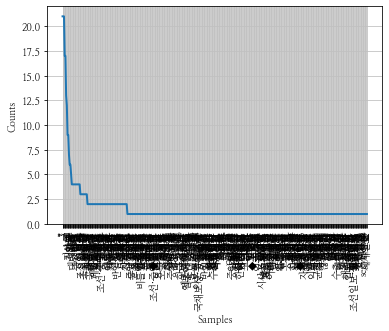

In [24]:
%matplotlib inline
txtObj.plot()

In [25]:
txtObj.vocab().freq('청와대')

0.00723589001447178

In [26]:
ratio = 0
for word in txtObj.vocab().most_common(10):
    ratio += txtObj.vocab().freq(word[0])
    print(txtObj.vocab().freq(word[0]))
print('ratio:', ratio)

0.030390738060781478
0.030390738060781478
0.030390738060781478
0.024602026049204053
0.024602026049204053
0.01881331403762663
0.017366136034732273
0.013024602026049204
0.013024602026049204
0.010130246020260492
ratio: 0.21273516642547036


In [27]:
corpus = '\n'.join(contents)
txtObj = Text(word_tokenize(corpus))
txtObj.vocab().B(), txtObj.vocab().N()

(7380, 17014)

In [28]:
from math import log

m = txtObj.vocab().most_common(1)[0][1]
result = [(token, freq / m) for token, freq in sorted(
    txtObj.vocab().items(), key=lambda x: x[1], reverse=True)]
n = len(result)

freq = [f for _, f in result]
rank = [1 / (_ + 1) for _ in range(n)]

_freq = [log(f) for _, f in result]
_rank = [log(_) for _ in rank]

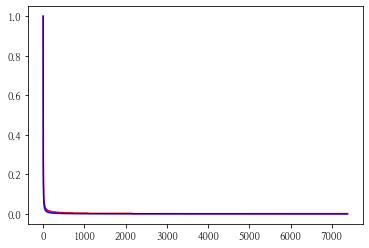

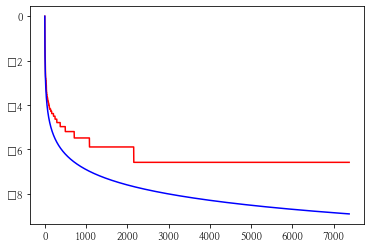

In [29]:
import matplotlib.pyplot as plt


plt.plot([x for x in range(n)], freq, "r-")
plt.plot([x for x in range(n)], rank, "b-")
plt.show()

plt.plot([x for x in range(n)], _freq, "r-")
plt.plot([x for x in range(n)], _rank, "b-")
plt.show()

## Heaps' Law

In [30]:
from konlpy.tag import Okt


K = 10  # 10 - 100
B = 0.6  # 0.4 ~ 0.6 정도의 상수

unique, total, heaps = [], [], []
corpus = ''
for content in contents:
    corpus += content
    txtObj = Text(Okt().morphs(corpus))
    unique.append(txtObj.vocab().B())
    total.append(txtObj.vocab().N())
    heaps.append(K * txtObj.vocab().N()**B)

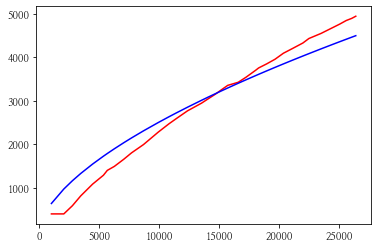

In [31]:
plt.plot(total, unique, 'r-')
plt.plot(total, heaps,  'b-')

## ngram

In [32]:
def 어절(sentence, n=2):
    tokens = word_tokenize(sentence)
    return [tuple(tokens[token:token+n]) for token in range(len(tokens) - (n-1))]

In [33]:
어절('Happy Life is short!')

[('Happy', 'Life'), ('Life', 'is'), ('is', 'short'), ('short', '!')]

In [34]:
어절('Happy Life is short!', n=3)

[('Happy', 'Life', 'is'), ('Life', 'is', 'short'), ('is', 'short', '!')]

In [35]:
from collections import defaultdict


freq = defaultdict(int)
for n in 어절(contents[0]):
    freq[n] += 1

In [36]:
freq[('고민정', '청와대')]/sum(freq.values())*freq[('청와대', '대변인')]/freq[('대변인', '.')]

0.002898550724637681

In [37]:
def 음절(sentence, n=2):
    tokens = list(sentence)
    return [''.join(tokens[i:i+n]) for i in range(len(tokens))]

In [38]:
음절('Life is too short!')

['Li',
 'if',
 'fe',
 'e ',
 ' i',
 'is',
 's ',
 ' t',
 'to',
 'oo',
 'o ',
 ' s',
 'sh',
 'ho',
 'or',
 'rt',
 't!',
 '!']

In [39]:
음절('안녕하세요')

['안녕', '녕하', '하세', '세요', '요']

## stopwords

In [40]:
from nltk.corpus import stopwords
print(stopwords.open('english').read())

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't



## BPE
해당 분석기를 통해 형태소를 분석해서 욕설 필터링 등 응용할 수 있는 것이 많다.

In [41]:
tokens = {
    "l o w </w>" : 5,
    "l o w e s t </w>" : 2,
    "n e w e r </w>" : 6,
    "r i d e r </w>" : 3
}

def findBigram(tokens):
    ngram = defaultdict(int)
    for token, freq in tokens.items():
        syllables = token.split()
        for i in range(len(syllables)-1):
            ngram[tuple(syllables[i:i+2])] += freq
    return ngram

def mergeMaxkey(ngram, tokens, K):
    maxKey = max(ngram, key=ngram.get)
    maxValue = max(ngram.values())
    newTokens = dict()
    for token, freq in tokens.items():
        newTokens[re.sub(" ".join(maxKey), "".join(maxKey), token)
                 if maxValue > K else token] = freq
    # print(maxKey)
    return newTokens

In [42]:
K = max(tokens.values())
for _ in range(100):
    maxKey = findBigram(tokens)
    tokens = mergeMaxkey(maxKey, tokens, K)

pattern = r"[A-Za-z\/\<\>]{2,}"
result = []
for _ in tokens:
    result.extend([_ for _ in re.findall(pattern, _)
        if _ != "</w>"])
set(result)

{'er</w>', 'low'}

In [43]:
tokens = {
    "아 버 지 가 </w>" : 5,
    "아 버 지 께 서 </w>" : 2,
    "아 버 지 를 </w>" : 6,
    "아 버 지 에 게 </w>" : 3
}

K = max(tokens.values())
for _ in range(100):
    maxKey = findBigram(tokens)
    tokens = mergeMaxkey(maxKey, tokens, K)

pattern = r"[가-힣A-Za-z\/\<\>]{2,}"
result = []
for _ in tokens:
    result.extend([_ for _ in re.findall(pattern, _)
        if _ != "</w>"])
set(result)

{'아버지'}

## WordCloud

In [44]:
from wordcloud import WordCloud
wc = WordCloud('nanum.ttf', background_color='white')

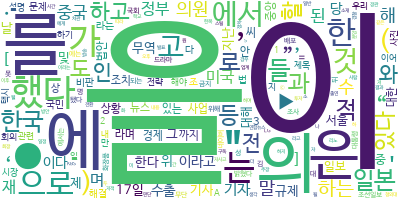

In [45]:
wc.generate_from_frequencies(txtObj.vocab())
wc.to_image()

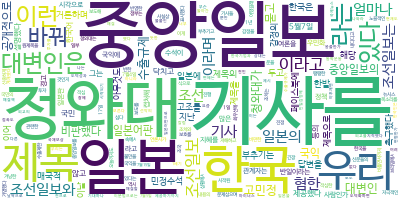

In [46]:
wc.generate_from_text(contents[0])
wc.to_image()